In [1]:
#Imports
from tcn import TCN, tcn_full_summary
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
#Read data from CSV files
train_data = pd.read_csv('2022-09-26-18-56-30-ground_truth-state.csv')
test_data  = pd.read_csv('2022-09-26-18-56-30-odom-local.csv')
odom_data  = pd.read_csv('2022-09-26-18-56-30-odom.csv')

In [3]:
#Drop unwanted features
train_data.drop(['.header.seq', '.header.frame_id', '.child_frame_id', 'time', '.pose.covariance', '.twist.covariance'], axis=1, inplace=True)
test_data.drop(['.header.seq', '.header.frame_id', '.child_frame_id', 'time', '.pose.covariance', '.twist.covariance'], axis=1, inplace=True)
odom_data.drop(['.header.seq', '.header.frame_id', '.child_frame_id', 'time', '.pose.covariance', '.twist.covariance'], axis=1, inplace=True)

In [4]:
#Check input shape
print(test_data.shape)
print(train_data.shape)
print(len(train_data))
train_data.head()
test_data.head()

(4716, 15)
(4716, 15)
4716


,.header.stamp.secs,.header.stamp.nsecs,.pose.pose.position.x,.pose.pose.position.y,.pose.pose.position.z,.pose.pose.orientation.x,.pose.pose.orientation.y,.pose.pose.orientation.z,.pose.pose.orientation.w,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z
0,6,520000000,-1.670000e-07,1.070000e-07,0.193719,-0.000913,-0.005552,0.000003,0.999984,-0.000009,0.000008,0.000468,-0.000001,0.000550,-0.000047
1,6,540000000,-1.650000e-07,1.060000e-07,0.193718,-0.000913,-0.005552,0.000004,0.999984,-0.000008,0.000008,0.000463,-0.000001,0.000543,-0.000046
2,6,580000000,-1.630000e-07,1.050000e-07,0.193718,-0.000913,-0.005552,0.000004,0.999984,-0.000008,0.000008,0.000453,-0.000001,0.000531,-0.000045
3,6,580000000,-1.630000e-07,1.050000e-07,0.193718,-0.000913,-0.005552,0.000004,0.999984,-0.000008,0.000008,0.000453,-0.000001,0.000531,-0.000045
4,6,600000000,-1.610000e-07,1.040000e-07,0.193717,-0.000913,-0.005552,0.000004,0.999984,-0.000008,0.000008,0.000449,-0.000001,0.000525,-0.000045


In [5]:
# define the keras MLP model for x
model = Sequential()
model.add(Dense(20, input_dim=12, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss='mse', optimizer='adam')

In [6]:
# split into input (X) and output (y) variables for (.pose.pose.X)
dataset = train_data.values
X, y = dataset[:, [0,1,5,6,7,8,9,10,11,12,13,14]], dataset[:, [2]]
print(X.shape)
print(y.shape)
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# evaluate on test set for (.pose.pose.X)
yhatX = model.predict(X_test)
error = mean_absolute_error(y_test, yhatX)
print('MAE: %.3f' % error)

(4716, 12)
(4716, 1)
Epoch 1/150
99/99 - 0s - loss: 65117553952817152.0000 - 267ms/epoch - 3ms/step
Epoch 2/150
99/99 - 0s - loss: 444585687908352.0000 - 55ms/epoch - 559us/step
Epoch 3/150
99/99 - 0s - loss: 90652114944.0000 - 62ms/epoch - 630us/step
Epoch 4/150
99/99 - 0s - loss: 2611377.2500 - 59ms/epoch - 593us/step
Epoch 5/150
99/99 - 0s - loss: 15564.4014 - 59ms/epoch - 597us/step
Epoch 6/150
99/99 - 0s - loss: 14465.9268 - 52ms/epoch - 530us/step
Epoch 7/150
99/99 - 0s - loss: 12355.0557 - 53ms/epoch - 539us/step
Epoch 8/150
99/99 - 0s - loss: 9926.8037 - 52ms/epoch - 530us/step
Epoch 9/150
99/99 - 0s - loss: 8155.8789 - 70ms/epoch - 707us/step
Epoch 10/150
99/99 - 0s - loss: 6456.4224 - 54ms/epoch - 546us/step
Epoch 11/150
99/99 - 0s - loss: 5841.9004 - 56ms/epoch - 567us/step
Epoch 12/150
99/99 - 0s - loss: 5191.4458 - 60ms/epoch - 609us/step
Epoch 13/150
99/99 - 0s - loss: 4195.9673 - 57ms/epoch - 572us/step
Epoch 14/150
99/99 - 0s - loss: 3637.9324 - 52ms/epoch - 527us/step


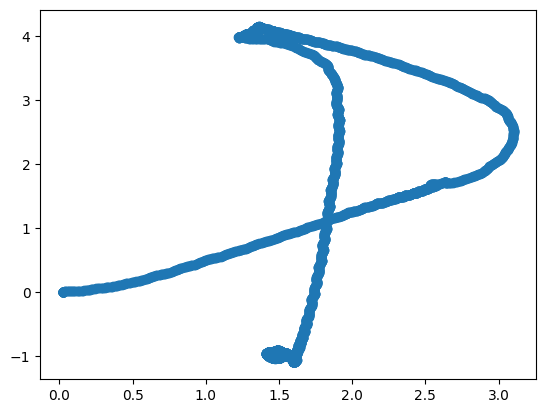

In [7]:
# importing Matplotlib and Numpy Packages
import numpy as np
import matplotlib.pyplot as plt

# generating two arrays from 10 to 1 and from 1 to 10
x, y = dataset[:, [2]], dataset[:, [3]]

# plot our list in X,Y coordinates
plt.scatter(x, y)
plt.show()

In [8]:
# split into input (X) and output (y) variables for (.pose.pose.Y)
dataset = train_data.values
X, y = dataset[:, [0,1,5,6,7,8,9,10,11,12,13,14]], dataset[:, [3]]
print(X.shape)
print(y.shape)
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# evaluate on test set for (.pose.pose.X)
yhatY = model.predict(X_test)
error = mean_absolute_error(y_test, yhatY)
print('MAE: %.3f' % error)

(4716, 12)
(4716, 1)
Epoch 1/150
99/99 - 0s - loss: 274.8558 - 147ms/epoch - 1ms/step
Epoch 2/150
99/99 - 0s - loss: 2699.6780 - 122ms/epoch - 1ms/step
Epoch 3/150
99/99 - 0s - loss: 8519.7832 - 138ms/epoch - 1ms/step
Epoch 4/150
99/99 - 0s - loss: 11373.2666 - 133ms/epoch - 1ms/step
Epoch 5/150
99/99 - 0s - loss: 34390.4219 - 113ms/epoch - 1ms/step
Epoch 6/150
99/99 - 0s - loss: 17207.2051 - 124ms/epoch - 1ms/step
Epoch 7/150
99/99 - 0s - loss: 3613.8589 - 135ms/epoch - 1ms/step
Epoch 8/150
99/99 - 0s - loss: 314595.6875 - 149ms/epoch - 2ms/step
Epoch 9/150
99/99 - 0s - loss: 30861.8555 - 126ms/epoch - 1ms/step
Epoch 10/150
99/99 - 0s - loss: 47731.6406 - 146ms/epoch - 1ms/step
Epoch 11/150
99/99 - 0s - loss: 28006828.0000 - 126ms/epoch - 1ms/step
Epoch 12/150
99/99 - 0s - loss: 1075448.7500 - 122ms/epoch - 1ms/step
Epoch 13/150
99/99 - 0s - loss: 193914585088.0000 - 149ms/epoch - 2ms/step
Epoch 14/150
99/99 - 0s - loss: 155041710080.0000 - 114ms/epoch - 1ms/step
Epoch 15/150
99/99 - 

(4716, 1)
(4716, 1)


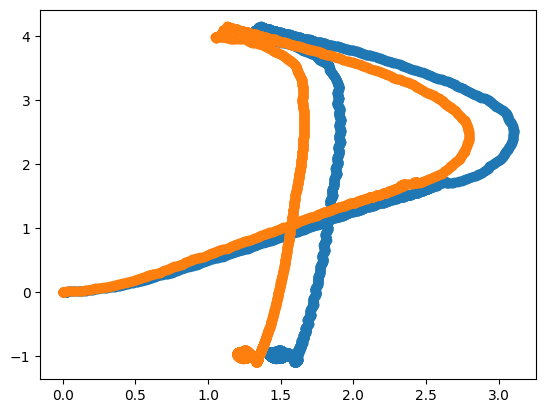

In [9]:
#Ground Truth
# importing Matplotlib and Numpy Packages
import numpy as np
import matplotlib.pyplot as plt

dataset_truth = train_data.values
dataset_odom = odom_data.values
# generating two arrays from 10 to 1 and from 1 to 10
x, y = dataset_truth[:, [2]], dataset[:, [3]]
x2, y2 = dataset_odom[:, [2]], dataset[:, [3]]
print(x2.shape)
print(y2.shape)

# plot our list in X,Y coordinates
plt.scatter(x, y)
plt.scatter(x2, y2)
plt.show()

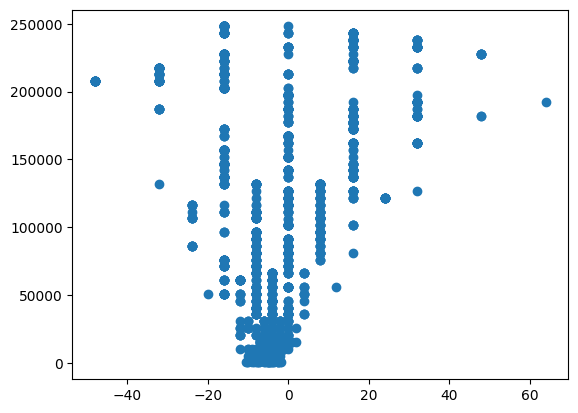

In [10]:
# importing Matplotlib and Numpy Packages
import numpy as np
import matplotlib.pyplot as plt

# plot our list in X,Y coordinates
plt.scatter(yhatX, yhatY)
plt.show()

In [11]:
# split into input (X) and output (y) variables for (.pose.pose.Z)
dataset = train_data.values
X, y = dataset[:, [0,1,5,6,7,8,9,10,11,12,13,14]], dataset[:, [4]]
print(X.shape)
print(y.shape)
X, y = X.astype('float'), y.astype('float')
n_features = X.shape[1]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# evaluate on test set for (.pose.pose.X)
yhatZ = model.predict(X_test)
error = mean_absolute_error(y_test, yhatZ)
print('MAE: %.3f' % error)

(4716, 12)
(4716, 1)
Epoch 1/150
99/99 - 0s - loss: 55841910784.0000 - 158ms/epoch - 2ms/step
Epoch 2/150
99/99 - 0s - loss: 52851126272.0000 - 130ms/epoch - 1ms/step
Epoch 3/150
99/99 - 0s - loss: 46013706240.0000 - 156ms/epoch - 2ms/step
Epoch 4/150
99/99 - 0s - loss: 14795626.0000 - 138ms/epoch - 1ms/step
Epoch 5/150
99/99 - 0s - loss: 9095951.0000 - 143ms/epoch - 1ms/step
Epoch 6/150
99/99 - 0s - loss: 43920.7852 - 115ms/epoch - 1ms/step
Epoch 7/150
99/99 - 0s - loss: 192589296.0000 - 118ms/epoch - 1ms/step
Epoch 8/150
99/99 - 0s - loss: 194673524736.0000 - 126ms/epoch - 1ms/step
Epoch 9/150
99/99 - 0s - loss: 35224346624.0000 - 119ms/epoch - 1ms/step
Epoch 10/150
99/99 - 0s - loss: 17938636.0000 - 121ms/epoch - 1ms/step
Epoch 11/150
99/99 - 0s - loss: 16940.1211 - 135ms/epoch - 1ms/step
Epoch 12/150
99/99 - 0s - loss: 44052.0508 - 113ms/epoch - 1ms/step
Epoch 13/150
99/99 - 0s - loss: 28559.6094 - 113ms/epoch - 1ms/step
Epoch 14/150
99/99 - 0s - loss: 86023.5078 - 130ms/epoch - 1m